In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans, Birch, DBSCAN

In [2]:
# To Load csv locally:

data_dir = os.getcwd()[:-27] +'data\\'
os.chdir(data_dir)
file_name = 'processed_data.csv'

In [3]:
# Read the data
data = pd.read_csv(file_name)
model_columns = ['acousticness', 'instrumentalness', 'danceability', 'energy'] 
model_data = data[model_columns].copy()
model_data.describe()

,acousticness,instrumentalness,danceability,energy
count,451325.000000,451325.000000,451325.000000,451325.000000
mean,0.083358,0.589289,0.686867,0.747856
std,0.184691,0.355736,0.140169,0.189761
min,0.000000,0.000000,0.023400,0.000020
25%,0.001040,0.210000,0.613000,0.632000
50%,0.007770,0.783000,0.715000,0.785000
75%,0.056200,0.880000,0.794000,0.903000
max,0.996000,0.999000,0.995000,1.000000


In [4]:
kmeans = KMeans(n_clusters=3, init='random', random_state=42, n_init='auto')
kmeans.fit(model_data)
model_data['cluster'] = kmeans.labels_
model_data['cluster'].value_counts()

1    284081
2    140860
0     26384
Name: cluster, dtype: int64

C:\Users\alexv\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


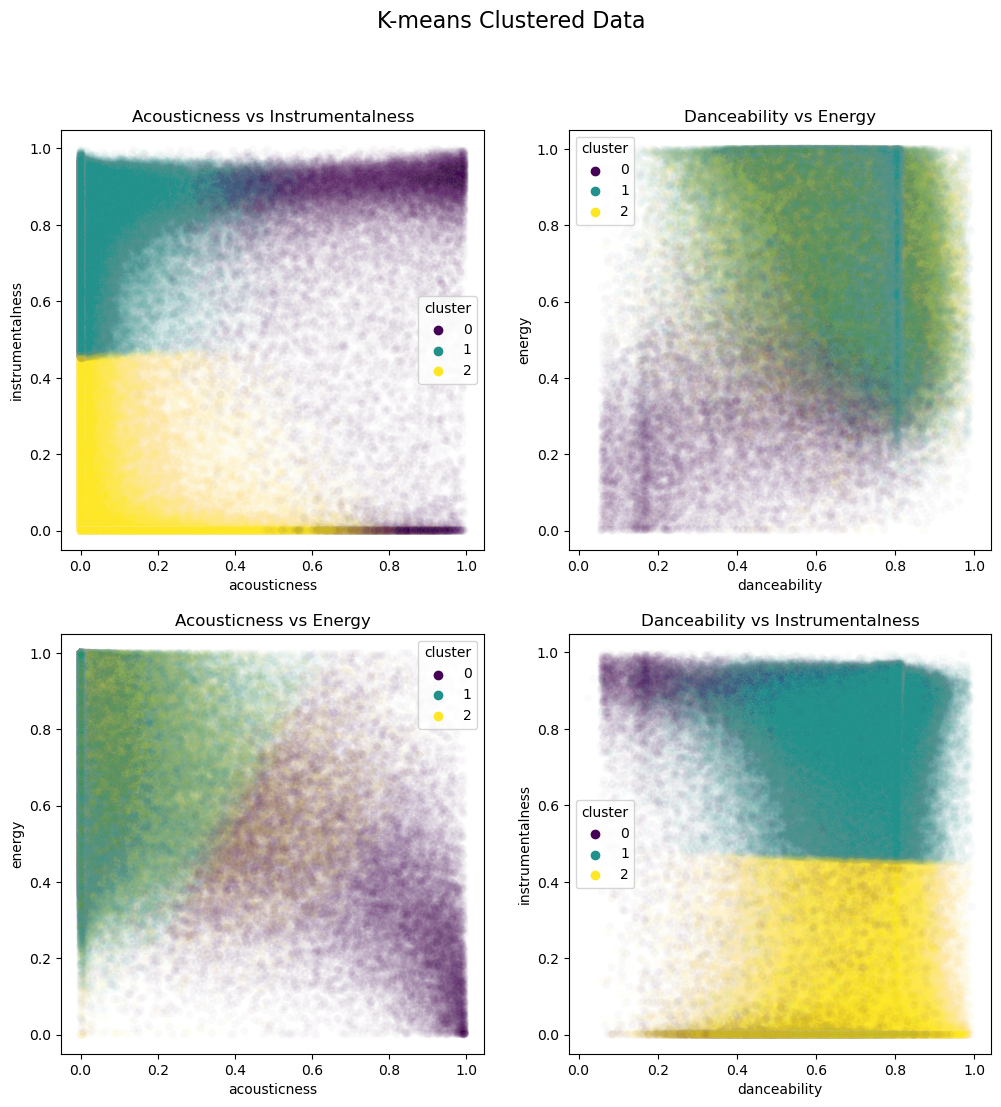

In [39]:
# Visualize the clusters using scatter plots
f, axes = plt.subplots(2, 2, figsize=(12, 12))
alpha = 0.02

f.suptitle("K-means Clustered Data", fontsize=16)
axes[0,0].set_title('Acousticness vs Instrumentalness')
axes[0,1].set_title('Danceability vs Energy')
axes[1,0].set_title('Acousticness vs Energy')
axes[1,1].set_title('Danceability vs Instrumentalness')
sns.scatterplot(x = 'acousticness', y = 'instrumentalness', data = model_data, alpha = alpha, hue = 'cluster', palette = 'viridis', ax=axes[0,0])
sns.scatterplot(x = 'danceability', y = 'energy', data = model_data, alpha = alpha, hue = 'cluster', palette = 'viridis', ax=axes[0,1])
sns.scatterplot(x = 'acousticness', y = 'energy', data = model_data, alpha = alpha, hue = 'cluster', palette = 'viridis', ax=axes[1,0])
sns.scatterplot(x = 'danceability', y = 'instrumentalness', data = model_data, alpha = alpha, hue = 'cluster', palette = 'viridis',ax=axes[1,1])
plt.show()

In [6]:
# Split the clusters into 3 DataFrames
clustered_data = model_data.groupby('cluster')
cluster_1 = clustered_data.get_group(0)
cluster_2 = clustered_data.get_group(1)
cluster_3 = clustered_data.get_group(2)

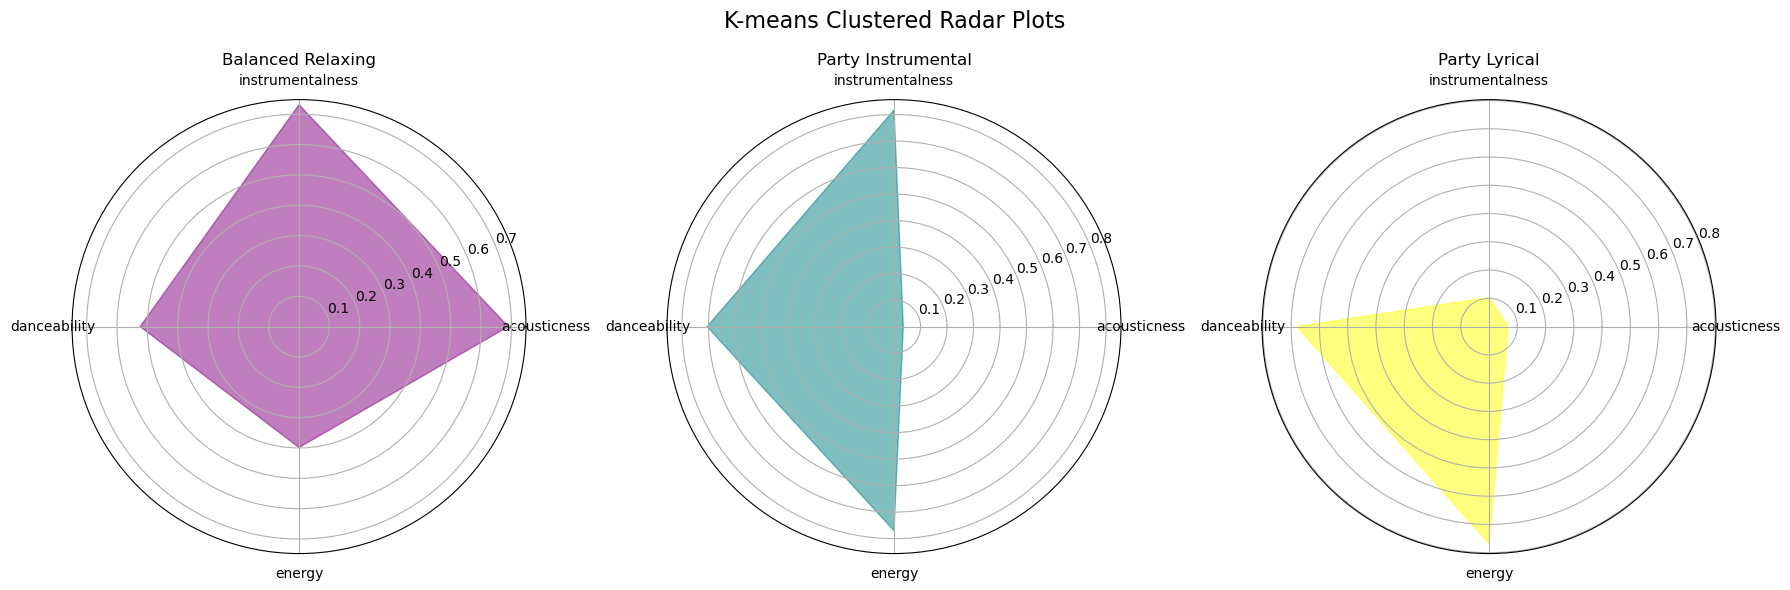

In [35]:
chart_1_values = [cluster_1['acousticness'].mean(), cluster_1['instrumentalness'].mean(), cluster_1['danceability'].mean(), cluster_1['energy'].mean()]
chart_2_values = [cluster_2['acousticness'].mean(), cluster_2['instrumentalness'].mean(), cluster_2['danceability'].mean(), cluster_2['energy'].mean()]
chart_3_values = [cluster_3['acousticness'].mean(), cluster_3['instrumentalness'].mean(), cluster_3['danceability'].mean(), cluster_3['energy'].mean()]

# Create an array of angles for each category
angles = np.linspace(0, 2 * np.pi, len(model_columns), endpoint=False).tolist()

# Close the plot by adding the starting angle at the end
chart_1_values += chart_1_values[:1]
chart_2_values += chart_2_values[:1]
chart_3_values += chart_3_values[:1]
angles += angles[:1]

# Create a figure with 3 radar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
fig.suptitle("K-means Clustered Radar Plots", fontsize=16)

# Plot chart 1
axes[0].fill(angles, chart_1_values, color='purple', alpha=0.5)
axes[0].set_title('Balanced Relaxing')
axes[0].set_xticks(angles[:-1])
axes[0].set_xticklabels(model_columns)

# Plot chart 2
axes[1].fill(angles, chart_2_values, color='teal', alpha=0.5)
axes[1].set_title('Party Instrumental')
axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(model_columns)

# Plot chart 3
axes[2].fill(angles, chart_3_values, color='yellow', alpha=0.5)
axes[2].set_title('Party Lyrical')
axes[2].set_xticks(angles[:-1])
axes[2].set_xticklabels(model_columns)

plt.tight_layout()
plt.show()

### Cluster Analysis

After examining the summary data we can define labels for the clusters and add them to the raw dataset to investigate how they are relating to the popularity of tracks. We define the following labels:

**Balanced Relaxing** - (vis. in purple) has mid danceability and energy, high acousticness and instrumentalness. 

**Party Instrumental** - this is the cluster (vis. in teal) that has an average high instrumentalness, danceability  and energy. We note that it has essentially no acousticness.

**Party Lyrical** - (vis. in yellow) has high energy and danceability, but essentially no acousticness and instrumentalness.  

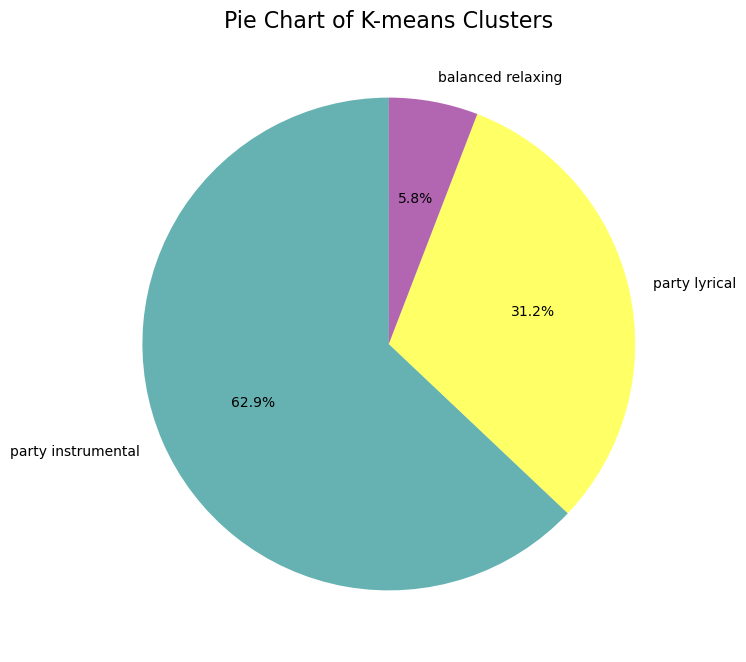

In [38]:
# Plot a pie chart to assess the size of clusters
labels = ['party instrumental','party lyrical', 'balanced relaxing']

plt.figure(figsize=(8, 8))
plt.pie(model_data['cluster'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=['teal', 'yellow', 'purple'], wedgeprops=dict(alpha=0.6))
plt.title('Pie Chart of K-means Clusters', fontsize= 16)
plt.show()

In [9]:
label_map = {0: 'balanced relaxing', 1:'party instrumental' , 2: 'party lyrical'}
model_data['label'] = model_data['cluster'].map(label_map)
labelled_data = pd.concat([data, model_data['label']], axis=1)
labelled_data.head()

,acousticness,artist_name,danceability,duration_m,energy,explicit,instrumentalness,key,liveness,loudness,mode,month,popularity,preview_url,speechiness,tempo,track_id,valence,year,label
0,0.00126,Headhunterz,0.355,2.943667,0.881,f,0.000002,9,0.0694,-3.962,1,7,26.0,https://p.scdn.co/mp3-preview/4229181352cb0c16...,0.1800,75,7o7Qx3kulN6A0uOaAPf5Vz,0.190,2022,party lyrical
1,0.18700,Headhunterz,0.552,3.902767,0.829,f,0.000054,6,0.2830,-4.988,0,9,51.0,https://p.scdn.co/mp3-preview/4d5c7620737fbd8e...,0.0845,150,0zolxiS5uiL5towOJrsJi4,0.367,2019,party lyrical
2,0.02730,Crossing Colors,0.839,5.818183,0.721,f,0.900000,9,0.0667,-7.721,0,7,9.0,https://p.scdn.co/mp3-preview/d8e54d5d229948b9...,0.0477,110,6AJ1Rk1khe1egig27nXImU,0.768,2018,party instrumental
3,0.01430,Brennan Heart,0.543,3.520000,0.827,f,0.000000,1,0.0842,-3.585,0,5,46.0,https://p.scdn.co/mp3-preview/a8e60e3bd2defda5...,0.0350,150,2KM4KCDbbfOvQ5cgWADd0Z,0.123,2021,party lyrical
4,0.01080,Brennan Heart,0.623,3.946667,0.832,f,0.000000,1,0.0487,-3.348,0,5,17.0,https://p.scdn.co/mp3-preview/758c6b9f2ff9b87b...,0.0566,150,7t2gGVF4Q7QnFM9dt9F0qE,0.439,2021,party lyrical


In [10]:
# Create three different dataframes for every class and drop samples with 0 popularity
party_inst = labelled_data[labelled_data['label'] == 'party instrumental']
bal_relax = labelled_data[labelled_data['label'] == 'party lyrical']
party_lyr = labelled_data[labelled_data['label'] == 'balanced relaxing']

party_inst = party_inst[party_inst['popularity'] != 0]
bal_relax = bal_relax[bal_relax['popularity'] != 0]
party_lyr = party_lyr[party_lyr['popularity'] != 0]

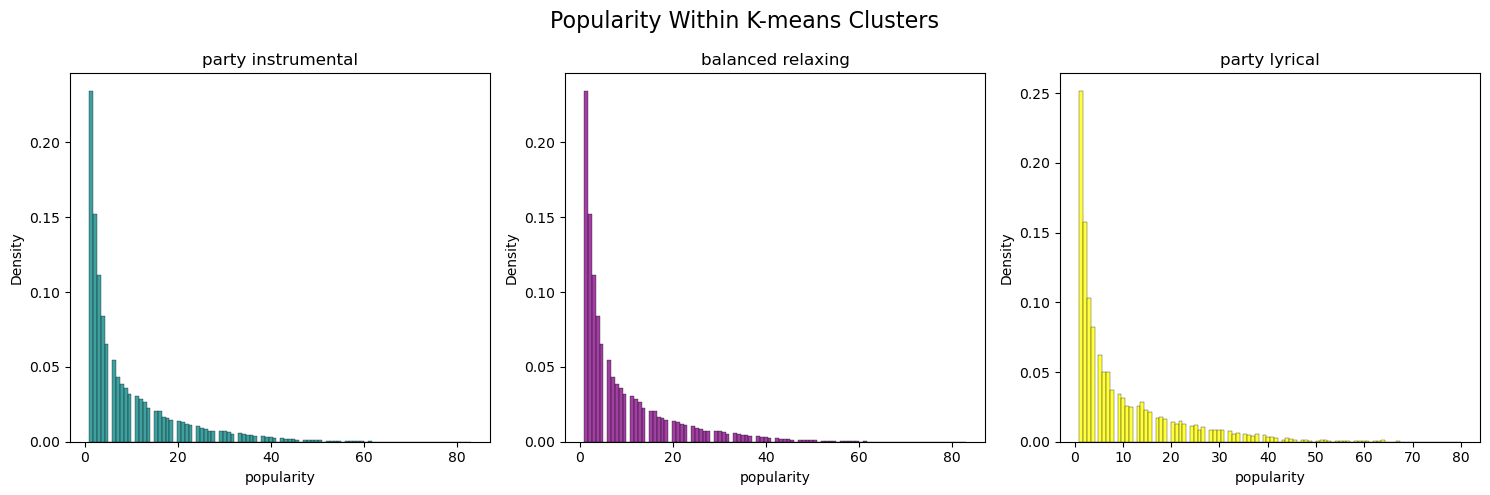

In [37]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram 1
sns.histplot(party_inst['popularity'], bins=100, kde=False, stat='density', color='teal', ax=axes[0])
axes[0].set_title('party instrumental')

# Histogram 2
sns.histplot(bal_relax['popularity'], bins=100, kde=False, stat='density', color='purple', ax=axes[1])
axes[1].set_title('balanced relaxing')

# Histogram 3
sns.histplot(party_lyr['popularity'], bins=100, kde=False, stat='density', color='yellow', ax=axes[2])
axes[2].set_title('party lyrical')

# Title
fig.suptitle('Popularity Within K-means Clusters', fontsize=16)

plt.tight_layout()
plt.show()

### Cluster Analysis
As the popularity data is heavily positively skewed it's better to analyse the IQR.

In [12]:
# Function to filter DataFrame based on IQR
def filter_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filtered_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return filtered_df
filtered_pi_popularity = filter_iqr(party_inst, 'popularity')
filtered_br_popularity = filter_iqr(bal_relax, 'popularity')
filtered_pl_popularity = filter_iqr(party_lyr, 'popularity')

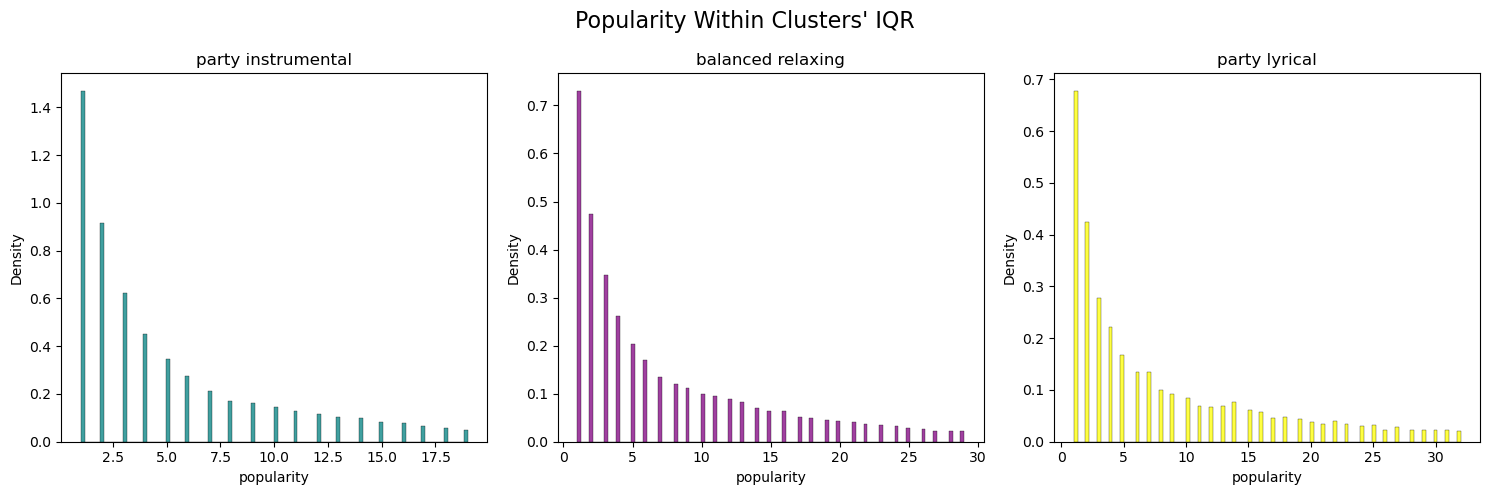

In [13]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram 1
sns.histplot(filtered_pi_popularity['popularity'], bins=100, kde=False, stat='density', color='teal',  ax=axes[0])
axes[0].set_title('party instrumental')

# Histogram 2
sns.histplot(filtered_br_popularity['popularity'], bins=100, kde=False, stat='density', color='purple', ax=axes[1])
axes[1].set_title('balanced relaxing')

# Histogram 3
sns.histplot(filtered_pl_popularity['popularity'], bins=100, kde=False, stat='density', color='yellow', ax=axes[2])
axes[2].set_title('party lyrical')

# Title
fig.suptitle('Popularity Within K-means Clusters\' IQR', fontsize=16)

plt.tight_layout()
plt.show()

In [14]:
labelled_data['label'].value_counts()

party instrumental    284081
party lyrical         140860
balanced relaxing      26384
Name: label, dtype: int64

We can see that both ```balanced relaxing``` and ```party lyrical``` categories o

In [15]:
print("Party Lyrical Mean Popularity:")
sum(filtered_pl_popularity['popularity'])/len(filtered_pl_popularity['popularity'])

Party Lyrical Mean Popularity:


7.910419974812462

In [16]:
print("Party Instrumental Mean Popularity:")
sum(filtered_pi_popularity['popularity'])/len(filtered_pi_popularity['popularity'])

Party Instrumental Mean Popularity:


4.905751311391957

In [17]:
print("Balanced Relaxing Mean Popularity:")
sum(filtered_br_popularity['popularity'])/len(filtered_br_popularity['popularity'])

Balanced Relaxing Mean Popularity:


7.2391912147724495

We can see that both ```balanced relaxing``` and ```party lyrical``` categories are significanlty more popular on average than the ```party instrumental``` category.

## DBSCAN Analysis

Below you can see the attempted clustering with the second best performing method.

**No difference in popularity in either category is observed**

In [18]:
dbs = DBSCAN(eps=0.70, min_samples=2)
brc = Birch(threshold=0.36, n_clusters=dbs)
dbscan_labels = brc.fit_predict(model_data[model_columns])

In [19]:
np.unique(dbscan_labels, return_counts=True)

(array([0, 1], dtype=int64), array([144755, 306570], dtype=int64))

In [20]:
dbscan_data = model_data[model_columns]
dbscan_data['cluster'] = dbscan_labels
dbscan_data['cluster'].value_counts()

C:\Users\alexv\AppData\Local\Temp\ipykernel_55764\4095066733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['cluster'] = dbscan_labels


1    306570
0    144755
Name: cluster, dtype: int64

In [21]:
db_clustered_data = dbscan_data.groupby('cluster')
db_cluster_1 = db_clustered_data.get_group(0)
db_cluster_2 = db_clustered_data.get_group(1)

In [22]:
db_cluster_1.head()

,acousticness,instrumentalness,danceability,energy,cluster
0,0.00126,0.000002,0.355,0.881,0
1,0.18700,0.000054,0.552,0.829,0
3,0.01430,0.000000,0.543,0.827,0
4,0.01080,0.000000,0.623,0.832,0
7,0.15200,0.004480,0.532,0.884,0


In [23]:
print(f'DBSCAN cluster_1 size: {len(db_cluster_1)}, DBSCAN cluster_2 size: {len(db_cluster_2)}')

DBSCAN cluster_1 size: 144755, DBSCAN cluster_2 size: 306570


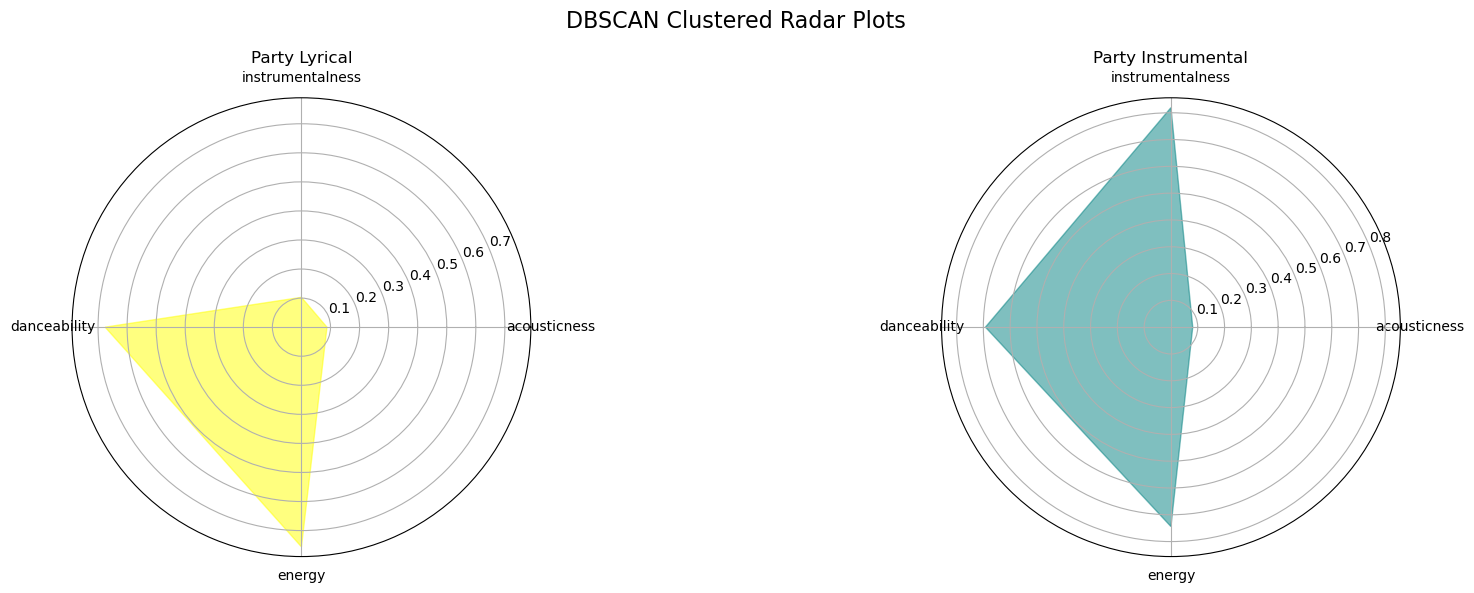

In [40]:
chart_1_values = [db_cluster_1['acousticness'].mean(), db_cluster_1['instrumentalness'].mean(), db_cluster_1['danceability'].mean(), db_cluster_1['energy'].mean()]
chart_2_values = [db_cluster_2['acousticness'].mean(), db_cluster_2['instrumentalness'].mean(), db_cluster_2['danceability'].mean(), db_cluster_2['energy'].mean()]

features = model_columns

# Create an array of angles for each category
angles = np.linspace(0, 2 * np.pi, len(model_columns), endpoint=False).tolist()

# Close the plot by adding the starting angle at the end
chart_1_values += chart_1_values[:1]
chart_2_values += chart_2_values[:1]
angles += angles[:1]

# Create a figure with 3 radar subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw=dict(polar=True))
fig.suptitle("DBSCAN Clustered Radar Plots", fontsize=16)

# Plot chart 1
axes[0].fill(angles, chart_1_values, color='yellow', alpha=0.5)
axes[0].set_title('Party Lyrical')
axes[0].set_xticks(angles[:-1])
axes[0].set_xticklabels(features)

# Plot chart 2
axes[1].fill(angles, chart_2_values, color='teal', alpha=0.5)
axes[1].set_title('Party Instrumental')
axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(features)


plt.tight_layout()
plt.show()

In [30]:
dbscan_label_map = {0: 'party lyrical', 1:'party instrumental'}
model_data['dbscan_label'] = dbscan_data['cluster'].map(dbscan_label_map)
labelled_data = pd.concat([data, model_data['dbscan_label']], axis=1)
labelled_data['dbscan_label'].value_counts()

party instrumental    306570
party lyrical         144755
Name: dbscan_label, dtype: int64

In [31]:
# Create two different dataframes for every class and drop samples with 0 popularity
party_lir = labelled_data[labelled_data['dbscan_label'] == 'party lyrical']
party_inst = labelled_data[labelled_data['dbscan_label'] == 'party instrumental']

party_lir = party_lir[party_lir['popularity'] != 0]
party_inst = bal_relax[bal_relax['popularity'] != 0]

print(f'Party Lyrical popular samples: {len(party_lir)}, Party Instrumental popular samples: {len(party_inst)}')

Party Lyrical popular samples: 102857, Party Instrumental popular samples: 100087


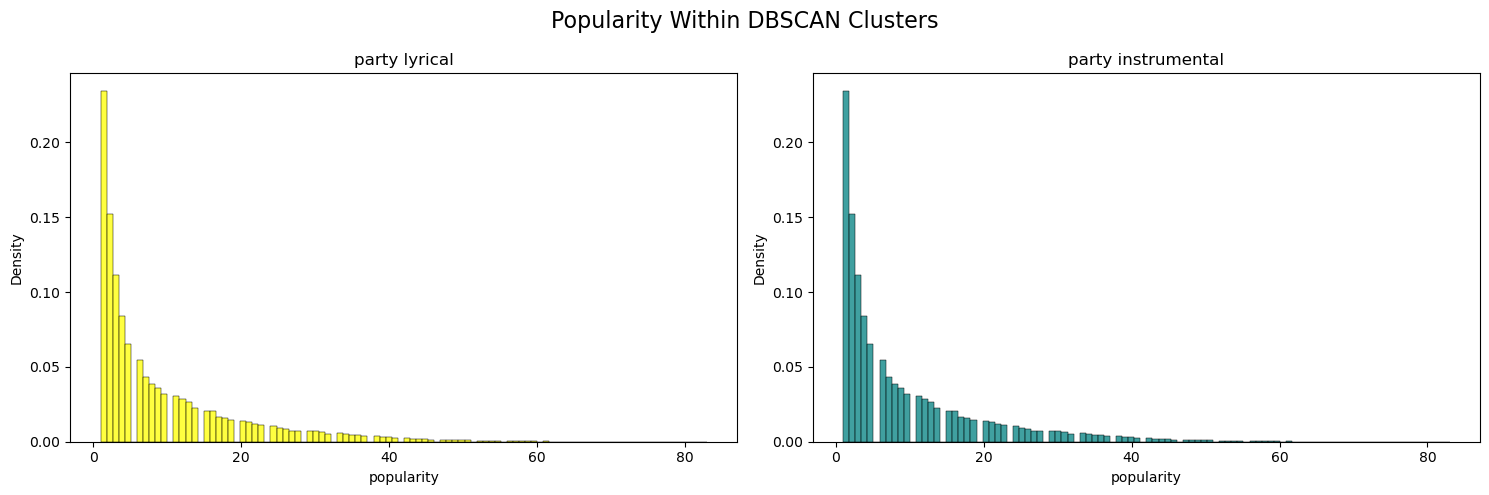

In [41]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram 1
sns.histplot(party_inst['popularity'], bins=100, kde=False, stat='density', color='yellow', ax=axes[0])
axes[0].set_title('party lyrical')

# Histogram 2
sns.histplot(bal_relax['popularity'], bins=100, kde=False, stat='density', color='teal', ax=axes[1])
axes[1].set_title('party instrumental')

# Title
fig.suptitle('Popularity Within DBSCAN Clusters', fontsize=16)

plt.tight_layout()
plt.show()

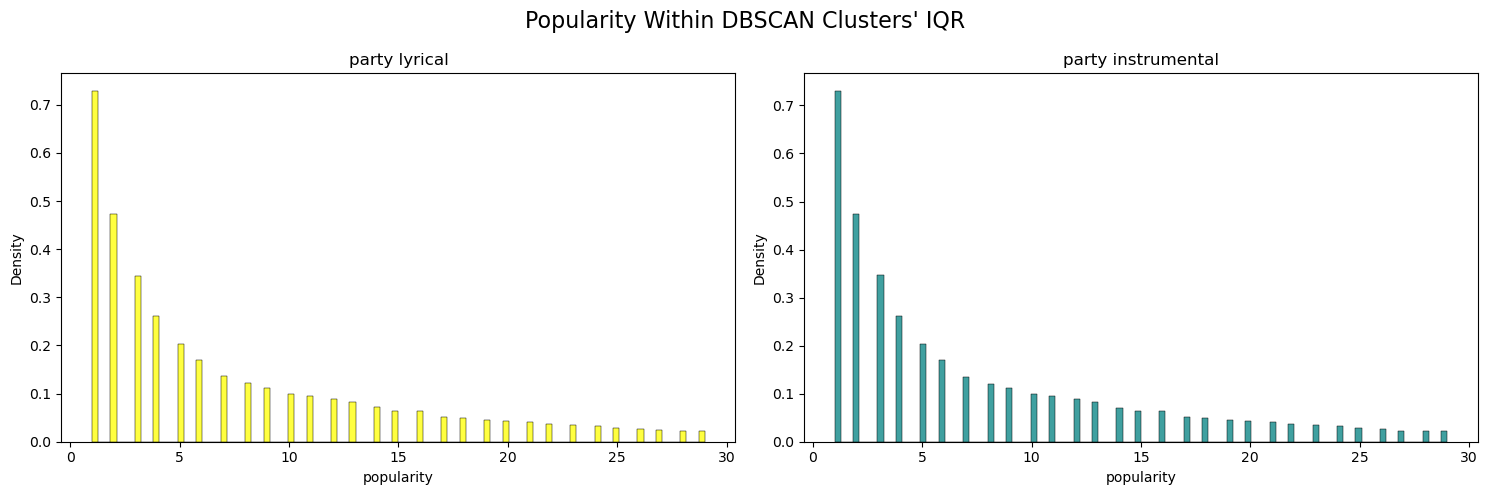

In [42]:
filtered_ba_popularity = filter_iqr(bal_acous, 'popularity')
filtered_pi_popularity = filter_iqr(party_inst, 'popularity')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram 1
sns.histplot(filtered_ba_popularity['popularity'], bins=100, kde=False, stat='density', color='yellow', ax=axes[0])
axes[0].set_title('party lyrical')

# Histogram 2
sns.histplot(filtered_pi_popularity['popularity'], bins=100, kde=False, stat='density', color='teal', ax=axes[1])
axes[1].set_title('party instrumental')

# Title
fig.suptitle('Popularity Within DBSCAN Clusters\' IQR', fontsize=16)

plt.tight_layout()
plt.show()